In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

#Function for evaluating Performance

In [2]:
def calculate_performance_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    perr = (mean_absolute_error(y_true, y_pred) / np.mean(y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    metrics = {
        'Dataset Name': dataset_name,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Percentage Error': perr,
        'R-Squared': r2
    }

    return metrics


In [3]:
def print_hyperparameters(regressor):
    # Get the hyperparameters
    params = regressor.get_params()

    # Print the hyperparameters
    for key, value in params.items():
        print(f"{key}: {value}")

#Data load and Preprocessing

In [4]:
file_path_train = "/content/Book1.xlsx"
file_path_test_1 = "/content/data_test100_20.xlsx"
file_path_test_2 = "/content/data_test100_30.xlsx"
file_path_test_3 = "/content/data_test100_40.xlsx"

#version 1 of below data - 7June
file_path_test_4 = "/content/data_test300_20.xlsx"
file_path_test_5 = "/content/data_test300_30.xlsx"
file_path_test_6 = "/content/data_test300_40.xlsx"
file_path_test_7 = "/content/data_test500_20.xlsx"
file_path_test_8 = "/content/data_test500_30.xlsx"
file_path_test_9 = "/content/data_test500_40.xlsx"

#version 2 of below data - 6June
# file_path_test_4 = "/content/data_test300_20_v2.xlsx"
# file_path_test_5 = "/content/data_test300_30_v2.xlsx"
# file_path_test_6 = "/content/data_test300_40_v2.xlsx"
# file_path_test_7 = "/content/data_test500_20_v2.xlsx"
# file_path_test_8 = "/content/data_test500_30_v2.xlsx"
# file_path_test_9 = "/content/data_test500_40_v2.xlsx"

data_train = pd.read_excel(file_path_train)
data_test_100_20 = pd.read_excel(file_path_test_1)
data_test_100_30 = pd.read_excel(file_path_test_2)
data_test_100_40 = pd.read_excel(file_path_test_3)
data_test_300_20 = pd.read_excel(file_path_test_4)
data_test_300_30 = pd.read_excel(file_path_test_5)
data_test_300_40 = pd.read_excel(file_path_test_6)
data_test_500_20 = pd.read_excel(file_path_test_7)
data_test_500_30 = pd.read_excel(file_path_test_8)
data_test_500_40 = pd.read_excel(file_path_test_9)

In [5]:
# training on the best dataset
X = data_train[['Particle Size','Temperature','Shear Rate']]
y = data_train['Viscosity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# testing only for 100nm at 20deg
X_test_100_20 = data_test_100_20[['Particle Size','Temperature','Shear Rate']]
y_test_100_20 = data_test_100_20['Viscosity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test_100_20)

# testing only for 100nm at 30deg
X_test_100_30 = data_test_100_30[['Particle Size','Temperature','Shear Rate']]
y_test_100_30 = data_test_100_30['Viscosity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test_100_30)

# testing only for 100nm at 40deg
X_test_100_40 = data_test_100_40[['Particle Size','Temperature','Shear Rate']]
y_test_100_40 = data_test_100_40['Viscosity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test_100_40)

# testing only for 300nm at 20deg
X_test_300_20 = data_test_300_20[['Particle Size','Temperature','Shear Rate']]
y_test_300_20 = data_test_300_20['Viscosity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test_300_20)

# testing only for 300nm at 30deg
X_test_300_30 = data_test_300_30[['Particle Size','Temperature','Shear Rate']]
y_test_300_30 = data_test_300_30['Viscosity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test_300_30)

# testing only for 300nm at 40deg
X_test_300_40 = data_test_300_40[['Particle Size','Temperature','Shear Rate']]
y_test_300_40 = data_test_300_40['Viscosity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test_300_40)

# testing only for 500nm at 20deg
X_test_500_20 = data_test_500_20[['Particle Size','Temperature','Shear Rate']]
y_test_500_20 = data_test_500_20['Viscosity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test_500_20)

# testing only for 500nm at 30deg
X_test_500_30 = data_test_500_30[['Particle Size','Temperature','Shear Rate']]
y_test_500_30 = data_test_500_30['Viscosity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test_500_30)

# testing only for 500nm at 40deg
X_test_500_40 = data_test_500_40[['Particle Size','Temperature','Shear Rate']]
y_test_500_40 = data_test_500_40['Viscosity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test_500_40)

In [6]:
# Concatenate the testing dataframes vertically
all_test_data = pd.concat([data_test_100_20, data_test_100_30, data_test_100_40,
                           data_test_300_20, data_test_300_30, data_test_300_40,
                           data_test_500_20, data_test_500_30, data_test_500_40],
                          axis=0)

# Extract features and target variable from the concatenated dataframe
X_test_all = all_test_data[['Particle Size', 'Temperature', 'Shear Rate']]
y_test_all = all_test_data['Viscosity']


In [7]:
tree = DecisionTreeRegressor(max_depth=20)
tree.fit(X, y)

# 2. Get Cost Complexity Pruning Path
path = tree.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 3. Train Decision Trees for Different Alpha Values
trees = []
for ccp_alpha in ccp_alphas:
    tree_pruned = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    tree_pruned.fit(X, y)
    trees.append(tree_pruned)

# Adjust test_size and random_state as needed

mse_scores = [mean_absolute_error(y_test_all, tree_pruned.predict(X_test_all)) for tree_pruned in trees]

# 5. Select the Best Alpha
optimal_alpha = ccp_alphas[np.argmin(mse_scores)]

# 6. Create and Train the Final Pruned Tree
final_tree = DecisionTreeRegressor(ccp_alpha=optimal_alpha,max_depth=10)
final_tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=1.5859214035092017, max_depth=10)

In [8]:
score = final_tree.score(X, y)
y_pred = final_tree.predict(X)
df = pd.DataFrame({
    'Actual': y,
    'DecisionTree_Predicted': y_pred,
})

score_100_20  = final_tree.score(X_test_100_20, y_test_100_20)
y_pred_100_20 = final_tree.predict(X_test_100_20)
df_100 = pd.DataFrame({
    'Actual': y_test_100_20,
    'DecisionTree_Predicted': y_pred_100_20,
})

score_100_30  = final_tree.score(X_test_100_30, y_test_100_30)
y_pred_100_30 = final_tree.predict(X_test_100_30)
df_100 = pd.DataFrame({
    'Actual': y_test_100_30,
    'DecisionTree_Predicted': y_pred_100_30,
})

score_100_40  = final_tree.score(X_test_100_40, y_test_100_40)
y_pred_100_40 = final_tree.predict(X_test_100_40)
df_100 = pd.DataFrame({
    'Actual': y_test_100_40,
    'DecisionTree_Predicted': y_pred_100_40,
})

score_300_20 = final_tree.score(X_test_300_20, y_test_300_20)
y_pred_300_20 = final_tree.predict(X_test_300_20)
df_100 = pd.DataFrame({
    'Actual':y_test_300_20,
    'DecisionTree_Predicted':y_pred_300_20
})

score_300_30 = final_tree.score(X_test_300_30, y_test_300_30)
y_pred_300_30 = final_tree.predict(X_test_300_30)
df_100 = pd.DataFrame({
    'Actual':y_test_300_30,
    'DecisionTree_Predicted':y_pred_300_30
})

score_300_40 = final_tree.score(X_test_300_40, y_test_300_40)
y_pred_300_40 = final_tree.predict(X_test_300_40)
df_100 = pd.DataFrame({
    'Actual':y_test_300_40,
    'DecisionTree_Predicted':y_pred_300_40
})

score_500_20 = final_tree.score(X_test_500_20, y_test_500_20)
y_pred_500_20 = final_tree.predict(X_test_500_20)
df_100 = pd.DataFrame({
    'Actual':y_test_500_20,
    'DecisionTree_Predicted':y_pred_500_20
})

score_500_30 = final_tree.score(X_test_500_30, y_test_500_30)
y_pred_500_30 = final_tree.predict(X_test_500_30)
df_100 = pd.DataFrame({
    'Actual':y_test_500_30,
    'DecisionTree_Predicted':y_pred_500_30
})

score_500_40 = final_tree.score(X_test_500_40, y_test_500_40)
y_pred_500_40 = final_tree.predict(X_test_500_40)
df_100 = pd.DataFrame({
    'Actual':y_test_500_40,
    'DecisionTree_Predicted':y_pred_500_40
})

print(f"R^2 Score for train: {score:.2f}")
print(f"R^2 Score for 100nm at 20deg: {score_100_20:.2f}")
print(f"R^2 Score for 100nm at 30deg: {score_100_30:.2f}")
print(f"R^2 Score for 100nm at 40deg: {score_100_40:.2f}")
print(f"R^2 Score for 300nm at 20deg: {score_300_20:.2f}")
print(f"R^2 Score for 300nm at 30deg: {score_300_30:.2f}")
print(f"R^2 Score for 300nm at 40deg: {score_300_40:.2f}")
print(f"R^2 Score for 500nm at 20deg: {score_500_20:.2f}")
print(f"R^2 Score for 500nm at 30deg: {score_500_30:.2f}")
print(f"R^2 Score for 500nm at 40deg: {score_500_40:.2f}")


R^2 Score for train: 1.00
R^2 Score for 100nm at 20deg: 0.80
R^2 Score for 100nm at 30deg: 1.00
R^2 Score for 100nm at 40deg: 0.98
R^2 Score for 300nm at 20deg: 0.68
R^2 Score for 300nm at 30deg: 0.82
R^2 Score for 300nm at 40deg: 0.94
R^2 Score for 500nm at 20deg: 0.91
R^2 Score for 500nm at 30deg: 0.61
R^2 Score for 500nm at 40deg: 0.81


In [9]:
metrics1 = calculate_performance_metrics(y_test_100_20, y_pred_100_20, "100nm_20deg")
metrics2 = calculate_performance_metrics(y_test_100_30, y_pred_100_30, "100nm_30deg")
metrics3 = calculate_performance_metrics(y_test_100_40, y_pred_100_40, "100nm_40deg")
metrics4 = calculate_performance_metrics(y_test_300_20, y_pred_300_20, "300nm_20deg")
metrics5 = calculate_performance_metrics(y_test_300_30, y_pred_300_30, "300nm_30deg")
metrics6 = calculate_performance_metrics(y_test_300_40, y_pred_300_40, "300nm_40deg")
metrics7 = calculate_performance_metrics(y_test_500_20, y_pred_500_20, "500nm_20deg")
metrics8 = calculate_performance_metrics(y_test_500_30, y_pred_500_30, "500nm_30deg")
metrics9 = calculate_performance_metrics(y_test_500_40, y_pred_500_40, "500nm_40deg")

# Print the performance metrics
print(f"Performance Metrics for {metrics1['Dataset Name']}:\n"
      f"  RMSE: {metrics1['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics1['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics1['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics2['Dataset Name']}:\n"
      f"  RMSE: {metrics2['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics2['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics2['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics3['Dataset Name']}:\n"
      f"  RMSE: {metrics3['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics3['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics3['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics4['Dataset Name']}:\n"
      f"  RMSE: {metrics4['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics4['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics4['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics5['Dataset Name']}:\n"
      f"  RMSE: {metrics5['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics5['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics5['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics6['Dataset Name']}:\n"
      f"  RMSE: {metrics6['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics6['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics6['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics7['Dataset Name']}:\n"
      f"  RMSE: {metrics7['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics7['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics7['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics8['Dataset Name']}:\n"
      f"  RMSE: {metrics8['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics8['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics8['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics9['Dataset Name']}:\n"
      f"  RMSE: {metrics9['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics9['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics9['R-Squared']:.2f}")

Performance Metrics for 100nm_20deg:
  RMSE: 24283.62
  Percentage Error: 32.11%
  R^2 Score: 0.80
Performance Metrics for 100nm_30deg:
  RMSE: 2562.01
  Percentage Error: 6.35%
  R^2 Score: 1.00
Performance Metrics for 100nm_40deg:
  RMSE: 5642.04
  Percentage Error: 12.88%
  R^2 Score: 0.98
Performance Metrics for 300nm_20deg:
  RMSE: 14113.35
  Percentage Error: 36.30%
  R^2 Score: 0.68
Performance Metrics for 300nm_30deg:
  RMSE: 4827.35
  Percentage Error: 24.58%
  R^2 Score: 0.82
Performance Metrics for 300nm_40deg:
  RMSE: 1570.92
  Percentage Error: 15.53%
  R^2 Score: 0.94
Performance Metrics for 500nm_20deg:
  RMSE: 4581.79
  Percentage Error: 20.99%
  R^2 Score: 0.91
Performance Metrics for 500nm_30deg:
  RMSE: 3220.88
  Percentage Error: 33.96%
  R^2 Score: 0.61
Performance Metrics for 500nm_40deg:
  RMSE: 974.36
  Percentage Error: 23.48%
  R^2 Score: 0.81


In [10]:
# Call the function
print_hyperparameters(final_tree)

ccp_alpha: 1.5859214035092017
criterion: squared_error
max_depth: 10
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: None
splitter: best


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.534771 to fit


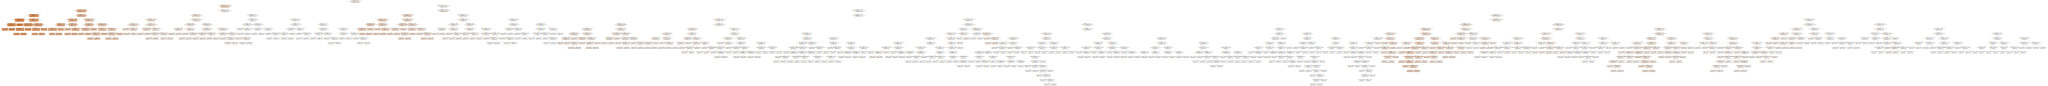

In [53]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(final_tree, out_file=None,
                                feature_names=['Particle Size', 'Temperature', 'Shear Rate'],
                                filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png") # Save as PNG
graph

In [78]:
import plotly.graph_objects as go

def plot_compare(y_test, y_pred):
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=y_test, mode='lines', name='Actual'))
    fig.add_trace(go.Scatter(y=y_pred, mode='lines', name='Predicted'))
    fig.update_layout(
        xaxis_title="Data Point Index",
        yaxis_title="Viscosity",
        title="Actual vs. Predicted Viscosity (500nm at 40deg)",
    )
    fig.show()


In [79]:
plot_compare(y_test_500_40, y_pred_500_40)

#Using Descision Tree Regressor

In [189]:
from sklearn.tree import DecisionTreeRegressor

In [190]:
regressor = DecisionTreeRegressor(random_state=2, max_depth=10)
regressor.fit(X,y)

DecisionTreeRegressor(max_depth=10, random_state=2)

In [22]:
score = regressor.score(X, y)
y_pred = regressor.predict(X)
df = pd.DataFrame({
    'Actual': y,
    'DecisionTree_Predicted': y_pred,
})

score_100_20  = regressor.score(X_test_100_20, y_test_100_20)
y_pred_100_20 = regressor.predict(X_test_100_20)
df_100 = pd.DataFrame({
    'Actual': y_test_100_20,
    'DecisionTree_Predicted': y_pred_100_20,
})

score_100_30  = regressor.score(X_test_100_30, y_test_100_30)
y_pred_100_30 = regressor.predict(X_test_100_30)
df_100 = pd.DataFrame({
    'Actual': y_test_100_30,
    'DecisionTree_Predicted': y_pred_100_30,
})

score_100_40  = regressor.score(X_test_100_40, y_test_100_40)
y_pred_100_40 = regressor.predict(X_test_100_40)
df_100 = pd.DataFrame({
    'Actual': y_test_100_40,
    'DecisionTree_Predicted': y_pred_100_40,
})

score_300_20 = regressor.score(X_test_300_20, y_test_300_20)
y_pred_300_20 = regressor.predict(X_test_300_20)
df_100 = pd.DataFrame({
    'Actual':y_test_300_20,
    'DecisionTree_Predicted':y_pred_300_20
})

score_300_30 = regressor.score(X_test_300_30, y_test_300_30)
y_pred_300_30 = regressor.predict(X_test_300_30)
df_100 = pd.DataFrame({
    'Actual':y_test_300_30,
    'DecisionTree_Predicted':y_pred_300_30
})

score_300_40 = regressor.score(X_test_300_40, y_test_300_40)
y_pred_300_40 = regressor.predict(X_test_300_40)
df_100 = pd.DataFrame({
    'Actual':y_test_300_40,
    'DecisionTree_Predicted':y_pred_300_40
})

score_500_20 = regressor.score(X_test_500_20, y_test_500_20)
y_pred_500_20 = regressor.predict(X_test_500_20)
df_100 = pd.DataFrame({
    'Actual':y_test_500_20,
    'DecisionTree_Predicted':y_pred_500_20
})

score_500_30 = regressor.score(X_test_500_30, y_test_500_30)
y_pred_500_30 = regressor.predict(X_test_500_30)
df_100 = pd.DataFrame({
    'Actual':y_test_500_30,
    'DecisionTree_Predicted':y_pred_500_30
})

score_500_40 = regressor.score(X_test_500_40, y_test_500_40)
y_pred_500_40 = regressor.predict(X_test_500_40)
df_100 = pd.DataFrame({
    'Actual':y_test_500_40,
    'DecisionTree_Predicted':y_pred_500_40
})

print(f"R^2 Score for train: {score:.2f}")
print(f"R^2 Score for 100nm at 20deg: {score_100_20:.2f}")
print(f"R^2 Score for 100nm at 30deg: {score_100_30:.2f}")
print(f"R^2 Score for 100nm at 40deg: {score_100_40:.2f}")
print(f"R^2 Score for 300nm at 20deg: {score_300_20:.2f}")
print(f"R^2 Score for 300nm at 30deg: {score_300_30:.2f}")
print(f"R^2 Score for 300nm at 40deg: {score_300_40:.2f}")
print(f"R^2 Score for 500nm at 20deg: {score_500_20:.2f}")
print(f"R^2 Score for 500nm at 30deg: {score_500_30:.2f}")
print(f"R^2 Score for 500nm at 40deg: {score_500_40:.2f}")


NameError: name 'regressor' is not defined

In [155]:
import plotly.graph_objects as go

def plot_compare(y_test, y_pred):
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=y_test, mode='lines', name='Actual'))
    fig.add_trace(go.Scatter(y=y_pred, mode='lines', name='Predicted'))
    fig.update_layout(
        xaxis_title="Data Point Index",
        yaxis_title="Viscosity",
        title="Actual vs. Predicted Viscosity (Decision Tree Regressor)",
    )
    fig.show()

In [156]:
plot_compare(y, y_pred)

In [157]:
plot_compare(y_test_100_20, y_pred_100_20)

In [158]:
plot_compare(y_test_300_30, y_pred_300_30)

In [159]:
plot_compare(y_test_500_40, y_pred_500_40)

#Gradient Boost Regressor

In [30]:
# Initialize the Gradient Boosting Regressor
gboost_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=20, random_state=42)
# Train the model on the training data
gboost_model.fit(X, y)

GradientBoostingRegressor(max_depth=20, n_estimators=50, random_state=42)

In [31]:
score = gboost_model.score(X, y)
y_pred = gboost_model.predict(X)
df = pd.DataFrame({
    'Actual': y,
    'DecisionTree_Predicted': y_pred,
})

score_100_20  = gboost_model.score(X_test_100_20, y_test_100_20)
y_pred_100_20 = gboost_model.predict(X_test_100_20)
df_100 = pd.DataFrame({
    'Actual': y_test_100_20,
    'DecisionTree_Predicted': y_pred_100_20,
})

score_100_30  = gboost_model.score(X_test_100_30, y_test_100_30)
y_pred_100_30 = gboost_model.predict(X_test_100_30)
df_100 = pd.DataFrame({
    'Actual': y_test_100_30,
    'DecisionTree_Predicted': y_pred_100_30,
})

score_100_40  = gboost_model.score(X_test_100_40, y_test_100_40)
y_pred_100_40 = gboost_model.predict(X_test_100_40)
df_100 = pd.DataFrame({
    'Actual': y_test_100_40,
    'DecisionTree_Predicted': y_pred_100_40,
})

score_300_20 = gboost_model.score(X_test_300_20, y_test_300_20)
y_pred_300_20 = gboost_model.predict(X_test_300_20)
df_100 = pd.DataFrame({
    'Actual':y_test_300_20,
    'DecisionTree_Predicted':y_pred_300_20
})

score_300_30 = gboost_model.score(X_test_300_30, y_test_300_30)
y_pred_300_30 = gboost_model.predict(X_test_300_30)
df_100 = pd.DataFrame({
    'Actual':y_test_300_30,
    'DecisionTree_Predicted':y_pred_300_30
})

score_300_40 = gboost_model.score(X_test_300_40, y_test_300_40)
y_pred_300_40 = gboost_model.predict(X_test_300_40)
df_100 = pd.DataFrame({
    'Actual':y_test_300_40,
    'DecisionTree_Predicted':y_pred_300_40
})

score_500_20 = gboost_model.score(X_test_500_20, y_test_500_20)
y_pred_500_20 = gboost_model.predict(X_test_500_20)
df_100 = pd.DataFrame({
    'Actual':y_test_500_20,
    'DecisionTree_Predicted':y_pred_500_20
})

score_500_30 = gboost_model.score(X_test_500_30, y_test_500_30)
y_pred_500_30 = gboost_model.predict(X_test_500_30)
df_100 = pd.DataFrame({
    'Actual':y_test_500_30,
    'DecisionTree_Predicted':y_pred_500_30
})

score_500_40 = gboost_model.score(X_test_500_40, y_test_500_40)
y_pred_500_40 = gboost_model.predict(X_test_500_40)
df_100 = pd.DataFrame({
    'Actual':y_test_500_40,
    'DecisionTree_Predicted':y_pred_500_40
})

print(f"R^2 Score for train: {score:.2f}")
print(f"R^2 Score for 100nm at 20deg: {score_100_20:.2f}")
print(f"R^2 Score for 100nm at 30deg: {score_100_30:.2f}")
print(f"R^2 Score for 100nm at 40deg: {score_100_40:.2f}")
print(f"R^2 Score for 300nm at 20deg: {score_300_20:.2f}")
print(f"R^2 Score for 300nm at 30deg: {score_300_30:.2f}")
print(f"R^2 Score for 300nm at 40deg: {score_300_40:.2f}")
print(f"R^2 Score for 500nm at 20deg: {score_500_20:.2f}")
print(f"R^2 Score for 500nm at 30deg: {score_500_30:.2f}")
print(f"R^2 Score for 500nm at 40deg: {score_500_40:.2f}")


R^2 Score for train: 1.00
R^2 Score for 100nm at 20deg: 0.79
R^2 Score for 100nm at 30deg: 1.00
R^2 Score for 100nm at 40deg: 0.98
R^2 Score for 300nm at 20deg: 0.68
R^2 Score for 300nm at 30deg: 0.86
R^2 Score for 300nm at 40deg: 0.94
R^2 Score for 500nm at 20deg: 0.91
R^2 Score for 500nm at 30deg: 0.61
R^2 Score for 500nm at 40deg: 0.81


In [23]:
metrics1 = calculate_performance_metrics(y_test_100_20, y_pred_100_20, "100nm_20deg")
metrics2 = calculate_performance_metrics(y_test_100_30, y_pred_100_30, "100nm_30deg")
metrics3 = calculate_performance_metrics(y_test_100_40, y_pred_100_40, "100nm_40deg")
metrics4 = calculate_performance_metrics(y_test_300_20, y_pred_300_20, "300nm_20deg")
metrics5 = calculate_performance_metrics(y_test_300_30, y_pred_300_30, "300nm_30deg")
metrics6 = calculate_performance_metrics(y_test_300_40, y_pred_300_40, "300nm_40deg")
metrics7 = calculate_performance_metrics(y_test_500_20, y_pred_500_20, "500nm_20deg")
metrics8 = calculate_performance_metrics(y_test_500_30, y_pred_500_30, "500nm_30deg")
metrics9 = calculate_performance_metrics(y_test_500_40, y_pred_500_40, "500nm_40deg")

# Print the performance metrics
print(f"Performance Metrics for {metrics1['Dataset Name']}:\n"
      f"  RMSE: {metrics1['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics1['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics1['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics2['Dataset Name']}:\n"
      f"  RMSE: {metrics2['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics2['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics2['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics3['Dataset Name']}:\n"
      f"  RMSE: {metrics3['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics3['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics3['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics4['Dataset Name']}:\n"
      f"  RMSE: {metrics4['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics4['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics4['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics5['Dataset Name']}:\n"
      f"  RMSE: {metrics5['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics5['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics5['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics6['Dataset Name']}:\n"
      f"  RMSE: {metrics6['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics6['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics6['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics7['Dataset Name']}:\n"
      f"  RMSE: {metrics7['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics7['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics7['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics8['Dataset Name']}:\n"
      f"  RMSE: {metrics8['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics8['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics8['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics9['Dataset Name']}:\n"
      f"  RMSE: {metrics9['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics9['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics9['R-Squared']:.2f}")

Performance Metrics for 100nm_20deg:
  RMSE: 24459.41
  Percentage Error: 32.26%
  R^2 Score: 0.79
Performance Metrics for 100nm_30deg:
  RMSE: 2273.18
  Percentage Error: 5.76%
  R^2 Score: 1.00
Performance Metrics for 100nm_40deg:
  RMSE: 5354.56
  Percentage Error: 12.11%
  R^2 Score: 0.98
Performance Metrics for 300nm_20deg:
  RMSE: 13949.47
  Percentage Error: 36.13%
  R^2 Score: 0.68
Performance Metrics for 300nm_30deg:
  RMSE: 4275.10
  Percentage Error: 22.39%
  R^2 Score: 0.86
Performance Metrics for 300nm_40deg:
  RMSE: 1527.90
  Percentage Error: 15.45%
  R^2 Score: 0.94
Performance Metrics for 500nm_20deg:
  RMSE: 4589.58
  Percentage Error: 20.50%
  R^2 Score: 0.91
Performance Metrics for 500nm_30deg:
  RMSE: 3205.29
  Percentage Error: 33.30%
  R^2 Score: 0.61
Performance Metrics for 500nm_40deg:
  RMSE: 969.66
  Percentage Error: 25.99%
  R^2 Score: 0.81


In [47]:
plot_compare(y, y_pred)

In [48]:
plot_compare(y_test_100_20, y_pred_100_20)

In [49]:
plot_compare(y_test_300_30, y_pred_300_30)

In [51]:
plot_compare(y_test_500_30, y_pred_500_30)

In [29]:
# prompt: similar to gradient boost model apply random forest model and give results like others

from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100,max_depth = 20, random_state=42)
rf_model.fit(X, y)

score = rf_model.score(X, y)
y_pred = rf_model.predict(X)
df = pd.DataFrame({
    'Actual': y,
    'RandomForest_Predicted': y_pred,
})

score_100_20 = rf_model.score(X_test_100_20, y_test_100_20)
y_pred_100_20 = rf_model.predict(X_test_100_20)
df_100 = pd.DataFrame({
    'Actual': y_test_100_20,
    'RandomForest_Predicted': y_pred_100_20,
})

score_100_30 = rf_model.score(X_test_100_30, y_test_100_30)
y_pred_100_30 = rf_model.predict(X_test_100_30)
df_100 = pd.DataFrame({
    'Actual': y_test_100_30,
    'RandomForest_Predicted': y_pred_100_30,
})

score_100_40 = rf_model.score(X_test_100_40, y_test_100_40)
y_pred_100_40 = rf_model.predict(X_test_100_40)
df_100 = pd.DataFrame({
    'Actual': y_test_100_40,
    'RandomForest_Predicted': y_pred_100_40,
})

score_300_20 = rf_model.score(X_test_300_20, y_test_300_20)
y_pred_300_20 = rf_model.predict(X_test_300_20)
df_100 = pd.DataFrame({
    'Actual': y_test_300_20,
    'RandomForest_Predicted': y_pred_300_20
})

score_300_30 = rf_model.score(X_test_300_30, y_test_300_30)
y_pred_300_30 = rf_model.predict(X_test_300_30)
df_100 = pd.DataFrame({
    'Actual': y_test_300_30,
    'RandomForest_Predicted': y_pred_300_30
})

score_300_40 = rf_model.score(X_test_300_40, y_test_300_40)
y_pred_300_40 = rf_model.predict(X_test_300_40)
df_100 = pd.DataFrame({
    'Actual': y_test_300_40,
    'RandomForest_Predicted': y_pred_300_40
})

score_500_20 = rf_model.score(X_test_500_20, y_test_500_20)
y_pred_500_20 = rf_model.predict(X_test_500_20)
df_100 = pd.DataFrame({
    'Actual': y_test_500_20,
    'RandomForest_Predicted': y_pred_500_20
})

score_500_30 = rf_model.score(X_test_500_30, y_test_500_30)
y_pred_500_30 = rf_model.predict(X_test_500_30)
df_100 = pd.DataFrame({
    'Actual': y_test_500_30,
    'RandomForest_Predicted': y_pred_500_30
})

score_500_40 = rf_model.score(X_test_500_40, y_test_500_40)
y_pred_500_40 = rf_model.predict(X_test_500_40)
df_100 = pd.DataFrame({
    'Actual': y_test_500_40,
    'RandomForest_Predicted': y_pred_500_40
})

print(f"R^2 Score for train: {score:.2f}")
print(f"R^2 Score for 100nm at 20deg: {score_100_20:.2f}")
print(f"R^2 Score for 100nm at 30deg: {score_100_30:.2f}")
print(f"R^2 Score for 100nm at 40deg: {score_100_40:.2f}")
print(f"R^2 Score for 300nm at 20deg: {score_300_20:.2f}")
print(f"R^2 Score for 300nm at 30deg: {score_300_30:.2f}")
print(f"R^2 Score for 300nm at 40deg: {score_300_40:.2f}")
print(f"R^2 Score for 500nm at 20deg: {score_500_20:.2f}")
print(f"R^2 Score for 500nm at 30deg: {score_500_30:.2f}")
print(f"R^2 Score for 500nm at 40deg: {score_500_40:.2f}")

metrics1 = calculate_performance_metrics(y_test_100_20, y_pred_100_20, "100nm_20deg")
metrics2 = calculate_performance_metrics(y_test_100_30, y_pred_100_30, "100nm_30deg")
metrics3 = calculate_performance_metrics(y_test_100_40, y_pred_100_40, "100nm_40deg")
metrics4 = calculate_performance_metrics(y_test_300_20, y_pred_300_20, "300nm_20deg")
metrics5 = calculate_performance_metrics(y_test_300_30, y_pred_300_30, "300nm_30deg")
metrics6 = calculate_performance_metrics(y_test_300_40, y_pred_300_40, "300nm_40deg")
metrics7 = calculate_performance_metrics(y_test_500_20, y_pred_500_20, "500nm_20deg")
metrics8 = calculate_performance_metrics(y_test_500_30, y_pred_500_30, "500nm_30deg")
metrics9 = calculate_performance_metrics(y_test_500_40, y_pred_500_40, "500nm_40deg")


R^2 Score for train: 1.00
R^2 Score for 100nm at 20deg: 0.81
R^2 Score for 100nm at 30deg: 1.00
R^2 Score for 100nm at 40deg: 0.99
R^2 Score for 300nm at 20deg: 0.69
R^2 Score for 300nm at 30deg: 0.83
R^2 Score for 300nm at 40deg: 0.89
R^2 Score for 500nm at 20deg: 0.89
R^2 Score for 500nm at 30deg: 0.68
R^2 Score for 500nm at 40deg: 0.68


In [28]:
metrics1 = calculate_performance_metrics(y_test_100_20, y_pred_100_20, "100nm_20deg")
metrics2 = calculate_performance_metrics(y_test_100_30, y_pred_100_30, "100nm_30deg")
metrics3 = calculate_performance_metrics(y_test_100_40, y_pred_100_40, "100nm_40deg")
metrics4 = calculate_performance_metrics(y_test_300_20, y_pred_300_20, "300nm_20deg")
metrics5 = calculate_performance_metrics(y_test_300_30, y_pred_300_30, "300nm_30deg")
metrics6 = calculate_performance_metrics(y_test_300_40, y_pred_300_40, "300nm_40deg")
metrics7 = calculate_performance_metrics(y_test_500_20, y_pred_500_20, "500nm_20deg")
metrics8 = calculate_performance_metrics(y_test_500_30, y_pred_500_30, "500nm_30deg")
metrics9 = calculate_performance_metrics(y_test_500_40, y_pred_500_40, "500nm_40deg")

# Print the performance metrics
print(f"Performance Metrics for {metrics1['Dataset Name']}:\n"
      f"  RMSE: {metrics1['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics1['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics1['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics2['Dataset Name']}:\n"
      f"  RMSE: {metrics2['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics2['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics2['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics3['Dataset Name']}:\n"
      f"  RMSE: {metrics3['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics3['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics3['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics4['Dataset Name']}:\n"
      f"  RMSE: {metrics4['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics4['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics4['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics5['Dataset Name']}:\n"
      f"  RMSE: {metrics5['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics5['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics5['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics6['Dataset Name']}:\n"
      f"  RMSE: {metrics6['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics6['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics6['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics7['Dataset Name']}:\n"
      f"  RMSE: {metrics7['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics7['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics7['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics8['Dataset Name']}:\n"
      f"  RMSE: {metrics8['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics8['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics8['R-Squared']:.2f}")

# Print the performance metrics
print(f"Performance Metrics for {metrics9['Dataset Name']}:\n"
      f"  RMSE: {metrics9['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics9['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics9['R-Squared']:.2f}")

Performance Metrics for 100nm_20deg:
  RMSE: 23253.56
  Percentage Error: 31.77%
  R^2 Score: 0.81
Performance Metrics for 100nm_30deg:
  RMSE: 2382.86
  Percentage Error: 6.30%
  R^2 Score: 1.00
Performance Metrics for 100nm_40deg:
  RMSE: 4173.77
  Percentage Error: 10.27%
  R^2 Score: 0.99
Performance Metrics for 300nm_20deg:
  RMSE: 13787.47
  Percentage Error: 34.99%
  R^2 Score: 0.69
Performance Metrics for 300nm_30deg:
  RMSE: 4589.03
  Percentage Error: 25.22%
  R^2 Score: 0.84
Performance Metrics for 300nm_40deg:
  RMSE: 2104.43
  Percentage Error: 20.21%
  R^2 Score: 0.89
Performance Metrics for 500nm_20deg:
  RMSE: 5014.88
  Percentage Error: 23.60%
  R^2 Score: 0.89
Performance Metrics for 500nm_30deg:
  RMSE: 2879.66
  Percentage Error: 30.58%
  R^2 Score: 0.69
Performance Metrics for 500nm_40deg:
  RMSE: 1256.53
  Percentage Error: 33.51%
  R^2 Score: 0.68


In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)
y_pred = knn_model.predict(X_test_100_20)

score = knn_model.score(X, y)
y_pred_train = knn_model.predict(X)

# Print scores
print(f"R^2 Score for train: {score:.2f}")

R^2 Score for train: 0.95


In [35]:

score = knn_model.score(X, y)
y_pred = knn_model.predict(X)
df = pd.DataFrame({
    'Actual': y,
    'RandomForest_Predicted': y_pred,
})

score_100_20 = knn_model.score(X_test_100_20, y_test_100_20)
y_pred_100_20 = knn_model.predict(X_test_100_20)
df_100 = pd.DataFrame({
    'Actual': y_test_100_20,
    'RandomForest_Predicted': y_pred_100_20,
})

score_100_30 = knn_model.score(X_test_100_30, y_test_100_30)
y_pred_100_30 = knn_model.predict(X_test_100_30)
df_100 = pd.DataFrame({
    'Actual': y_test_100_30,
    'RandomForest_Predicted': y_pred_100_30,
})

score_100_40 = knn_model.score(X_test_100_40, y_test_100_40)
y_pred_100_40 = knn_model.predict(X_test_100_40)
df_100 = pd.DataFrame({
    'Actual': y_test_100_40,
    'RandomForest_Predicted': y_pred_100_40,
})

score_300_20 = knn_model.score(X_test_300_20, y_test_300_20)
y_pred_300_20 = knn_model.predict(X_test_300_20)
df_100 = pd.DataFrame({
    'Actual': y_test_300_20,
    'RandomForest_Predicted': y_pred_300_20
})

score_300_30 = knn_model.score(X_test_300_30, y_test_300_30)
y_pred_300_30 = knn_model.predict(X_test_300_30)
df_100 = pd.DataFrame({
    'Actual': y_test_300_30,
    'RandomForest_Predicted': y_pred_300_30
})

score_300_40 = knn_model.score(X_test_300_40, y_test_300_40)
y_pred_300_40 = knn_model.predict(X_test_300_40)
df_100 = pd.DataFrame({
    'Actual': y_test_300_40,
    'RandomForest_Predicted': y_pred_300_40
})

score_500_20 = knn_model.score(X_test_500_20, y_test_500_20)
y_pred_500_20 = knn_model.predict(X_test_500_20)
df_100 = pd.DataFrame({
    'Actual': y_test_500_20,
    'RandomForest_Predicted': y_pred_500_20
})

score_500_30 = knn_model.score(X_test_500_30, y_test_500_30)
y_pred_500_30 = knn_model.predict(X_test_500_30)
df_100 = pd.DataFrame({
    'Actual': y_test_500_30,
    'RandomForest_Predicted': y_pred_500_30
})

score_500_40 = knn_model.score(X_test_500_40, y_test_500_40)
y_pred_500_40 = knn_model.predict(X_test_500_40)
df_100 = pd.DataFrame({
    'Actual': y_test_500_40,
    'RandomForest_Predicted': y_pred_500_40
})

print(f"R^2 Score for train: {score:.2f}")
print(f"R^2 Score for 100nm at 20deg: {score_100_20:.2f}")
print(f"R^2 Score for 100nm at 30deg: {score_100_30:.2f}")
print(f"R^2 Score for 100nm at 40deg: {score_100_40:.2f}")
print(f"R^2 Score for 300nm at 20deg: {score_300_20:.2f}")
print(f"R^2 Score for 300nm at 30deg: {score_300_30:.2f}")
print(f"R^2 Score for 300nm at 40deg: {score_300_40:.2f}")
print(f"R^2 Score for 500nm at 20deg: {score_500_20:.2f}")
print(f"R^2 Score for 500nm at 30deg: {score_500_30:.2f}")
print(f"R^2 Score for 500nm at 40deg: {score_500_40:.2f}")

metrics1 = calculate_performance_metrics(y_test_100_20, y_pred_100_20, "100nm_20deg")
metrics2 = calculate_performance_metrics(y_test_100_30, y_pred_100_30, "100nm_30deg")
metrics3 = calculate_performance_metrics(y_test_100_40, y_pred_100_40, "100nm_40deg")
metrics4 = calculate_performance_metrics(y_test_300_20, y_pred_300_20, "300nm_20deg")
metrics5 = calculate_performance_metrics(y_test_300_30, y_pred_300_30, "300nm_30deg")
metrics6 = calculate_performance_metrics(y_test_300_40, y_pred_300_40, "300nm_40deg")
metrics7 = calculate_performance_metrics(y_test_500_20, y_pred_500_20, "500nm_20deg")
metrics8 = calculate_performance_metrics(y_test_500_30, y_pred_500_30, "500nm_30deg")
metrics9 = calculate_performance_metrics(y_test_500_40, y_pred_500_40, "500nm_40deg")


R^2 Score for train: 0.95
R^2 Score for 100nm at 20deg: 0.74
R^2 Score for 100nm at 30deg: 0.97
R^2 Score for 100nm at 40deg: 0.92
R^2 Score for 300nm at 20deg: 0.37
R^2 Score for 300nm at 30deg: 0.83
R^2 Score for 300nm at 40deg: 0.48
R^2 Score for 500nm at 20deg: 0.59
R^2 Score for 500nm at 30deg: 0.63
R^2 Score for 500nm at 40deg: -2.07


In [33]:
# prompt: genrate similar using svm

from sklearn.svm import SVR

# ... (Your existing code for data loading and preprocessing) ...

# Support Vector Regressor
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)  # You can adjust kernel, C, and epsilon
svr_model.fit(X, y)

score = svr_model.score(X, y)
y_pred = svr_model.predict(X)
df = pd.DataFrame({
    'Actual': y,
    'SVR_Predicted': y_pred,
})

# ... (Calculate and print scores and metrics for all test sets similar to GradientBoostingRegressor and RandomForestRegressor) ...

score_100_20 = svr_model.score(X_test_100_20, y_test_100_20)
y_pred_100_20 = svr_model.predict(X_test_100_20)
df_100 = pd.DataFrame({
    'Actual': y_test_100_20,
    'SVR_Predicted': y_pred_100_20,
})

# ... (Repeat for other test sets: 100_30, 100_40, 300_20, 300_30, 300_40, 500_20, 500_30, 500_40) ...

print(f"R^2 Score for train: {score:.2f}")
print(f"R^2 Score for 100nm at 20deg: {score_100_20:.2f}")
# ... (Print scores for other test sets) ...

metrics1 = calculate_performance_metrics(y_test_100_20, y_pred_100_20, "100nm_20deg")
# ... (Calculate metrics for other test sets) ...

# Print the performance metrics
print(f"Performance Metrics for {metrics1['Dataset Name']}:\n"
      f"  RMSE: {metrics1['Root Mean Squared Error']:.2f}\n"
      f"  Percentage Error: {metrics1['Percentage Error']:.2f}%\n"
      f"  R^2 Score: {metrics1['R-Squared']:.2f}")
# ... (Print metrics for other test sets) ...



R^2 Score for train: -0.15
R^2 Score for 100nm at 20deg: -0.46
Performance Metrics for 100nm_20deg:
  RMSE: 65122.04
  Percentage Error: 87.79%
  R^2 Score: -0.46


In [ ]:

new_data_point = {'Particle Size': 250, 'Temperature': 25, 'Shear Rate': 100}

# If it's a dictionary, convert it to a DataFrame for prediction
input_data = pd.DataFrame([new_data_point])

# Make the prediction
predicted_viscosity = regressor.predict(input_data)

# Print the predicted viscosity
print("Predicted Viscosity:", predicted_viscosity[0])

#Using Locally Weighted Linear Regression

In [ ]:
def weight_calculate(x0, X, tau):
  #calculate the weight of each data point
  return np.exp(np.sum((X-x0) ** 2,axis=1)/(-2 * (tau **2)))

In [ ]:
def local_weighted_regression(x0, X, Y, tau):
  #add bias term
  x0 = np.r_[1, x0]
  X = np.c_[np.ones(len(X)), X]

  # fit model: normal equations with kernel
  xw = X.T * weight_calculate(x0, X, tau)
  theta = np.linalg.pinv(xw @ X) @ xw @ Y
  # "@" is used to
  # predict value
  return x0 @ theta


In [ ]:
X = data[['Particle Size','Temperature','Shear Rate']]
y = data['Viscosity']
X = X.to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = y.to_numpy()

data_test = pd.read_csv("/content/dataset_test.csv")
X_test = data_test[['Particle Size','Temperature','Shear Rate']]
y_test = data_test['Viscosity']
X_test = X_test.to_numpy()
X_scaled_t = scaler.fit_transform(X_test)

def apply_lwlr(X, y, tau):
    y_pred = []
    for i in range(X_test.shape[0]):  # Change to X_test.shape[0]
        y_pred.append(local_weighted_regression(X_test[i], X, y, tau))
    return np.array(y_pred)


# Set a value for tau (bandwidth parameter)
tau = 0.001

# Make predictions
y_pred = apply_lwlr(X_scaled, y, tau)

# Assume you have y_true and y_pred from your model
metrics = calculate_performance_metrics(y_test, y_pred)

print(f'Mean Squared Error: {metrics["Mean Squared Error"]:.4f}')
print(f'Root Mean Squared Error: {metrics["Root Mean Squared Error"]:.4f}')
print(f'Percentage Error: {metrics["Percentage Error"]:.4f}')
print(f'R-Squared: {metrics["R-Squared"]:.4f}')


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.533864 to fit


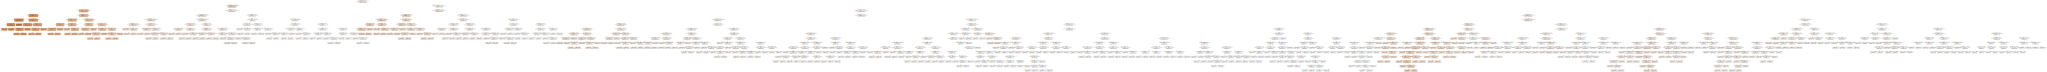

In [137]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(regressor, out_file=None,
                                feature_names=['Particle Size', 'Temperature', 'Shear Rate'],
                                filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png") # Save as PNG
graph